In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


/Users/dwightpaganlugo/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install --upgrade numpy


In [3]:
df = pd.read_csv("income.csv")

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [6]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [7]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [8]:
# One hot-enconding
df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis = 1)
df = df.drop('education', axis = 1)

df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis = 1)

df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df.race).add_prefix('race_')], axis = 1)

df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native_country_')], axis = 1)
        

In [9]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [11]:
#df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native_country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native_country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native_country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


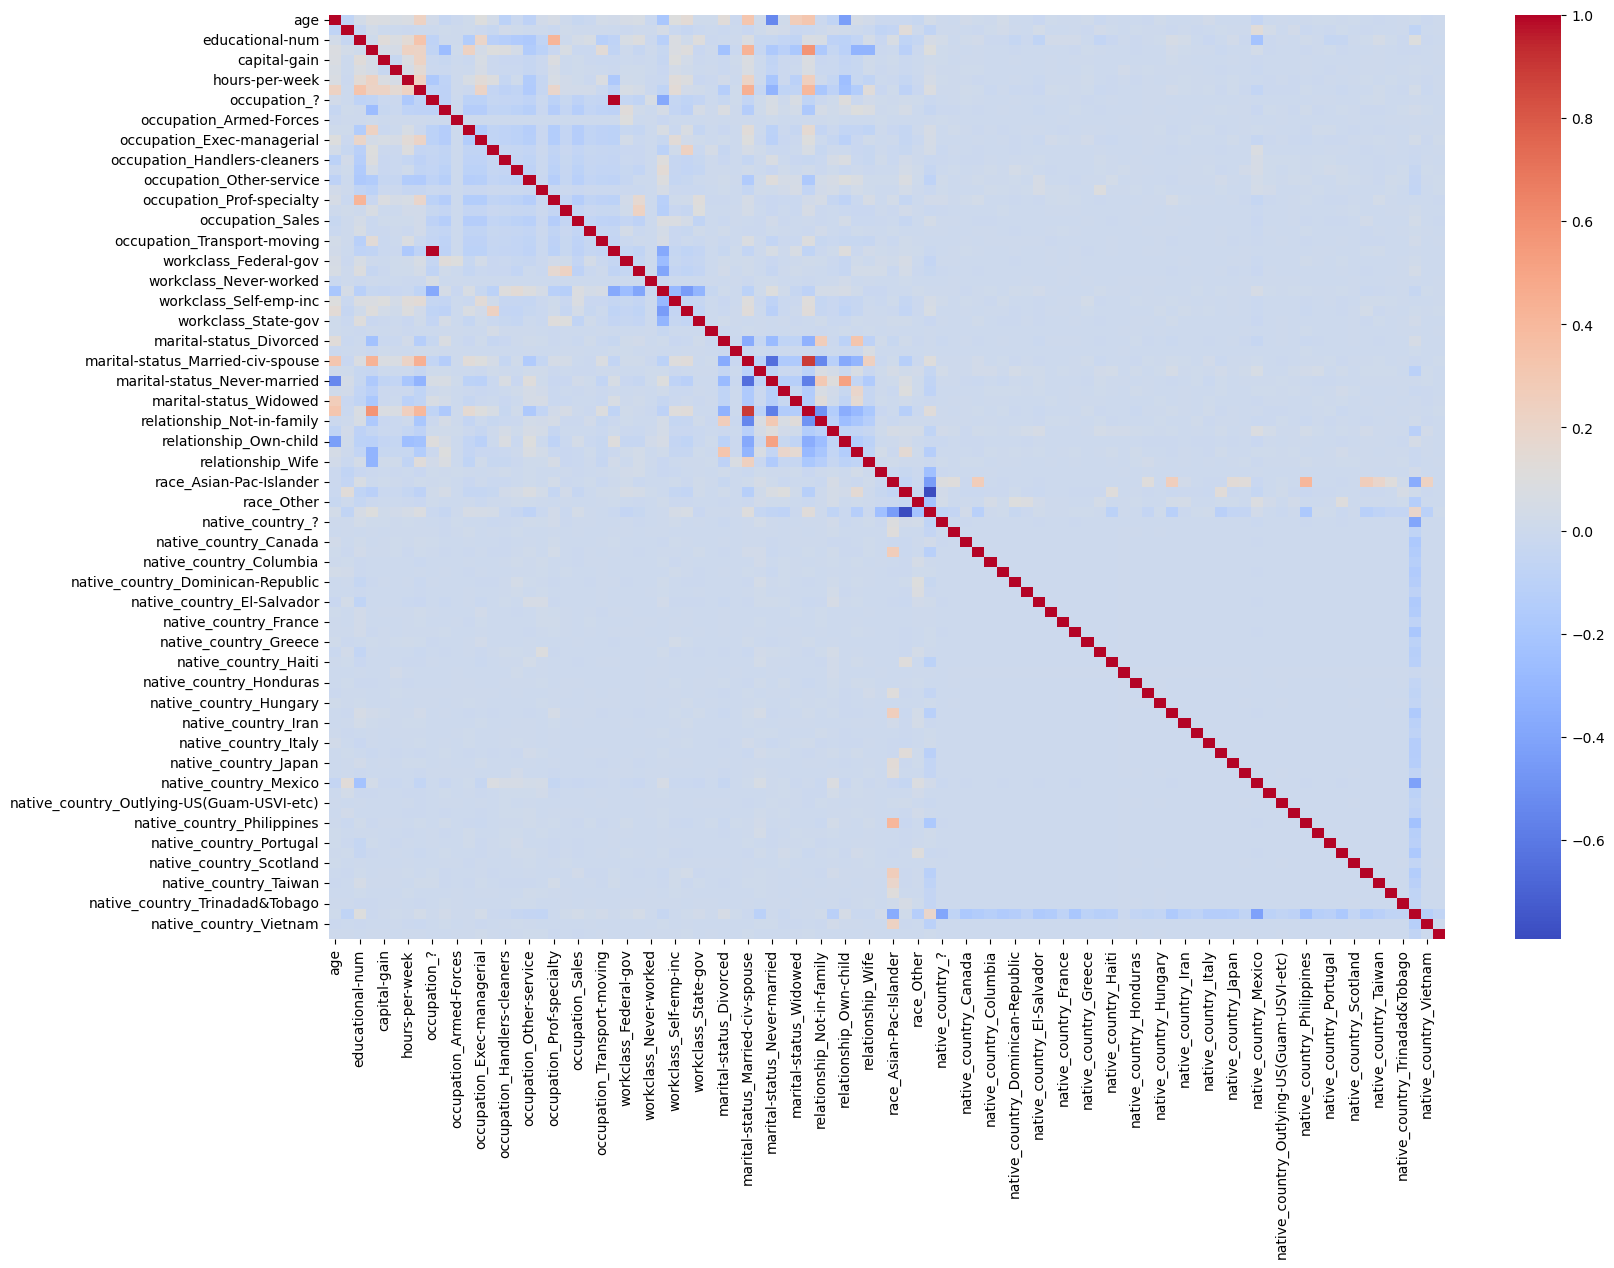

In [12]:
# check correlation
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

df.corr()

In [13]:
# drop features with lowest corr for visualization purposes
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

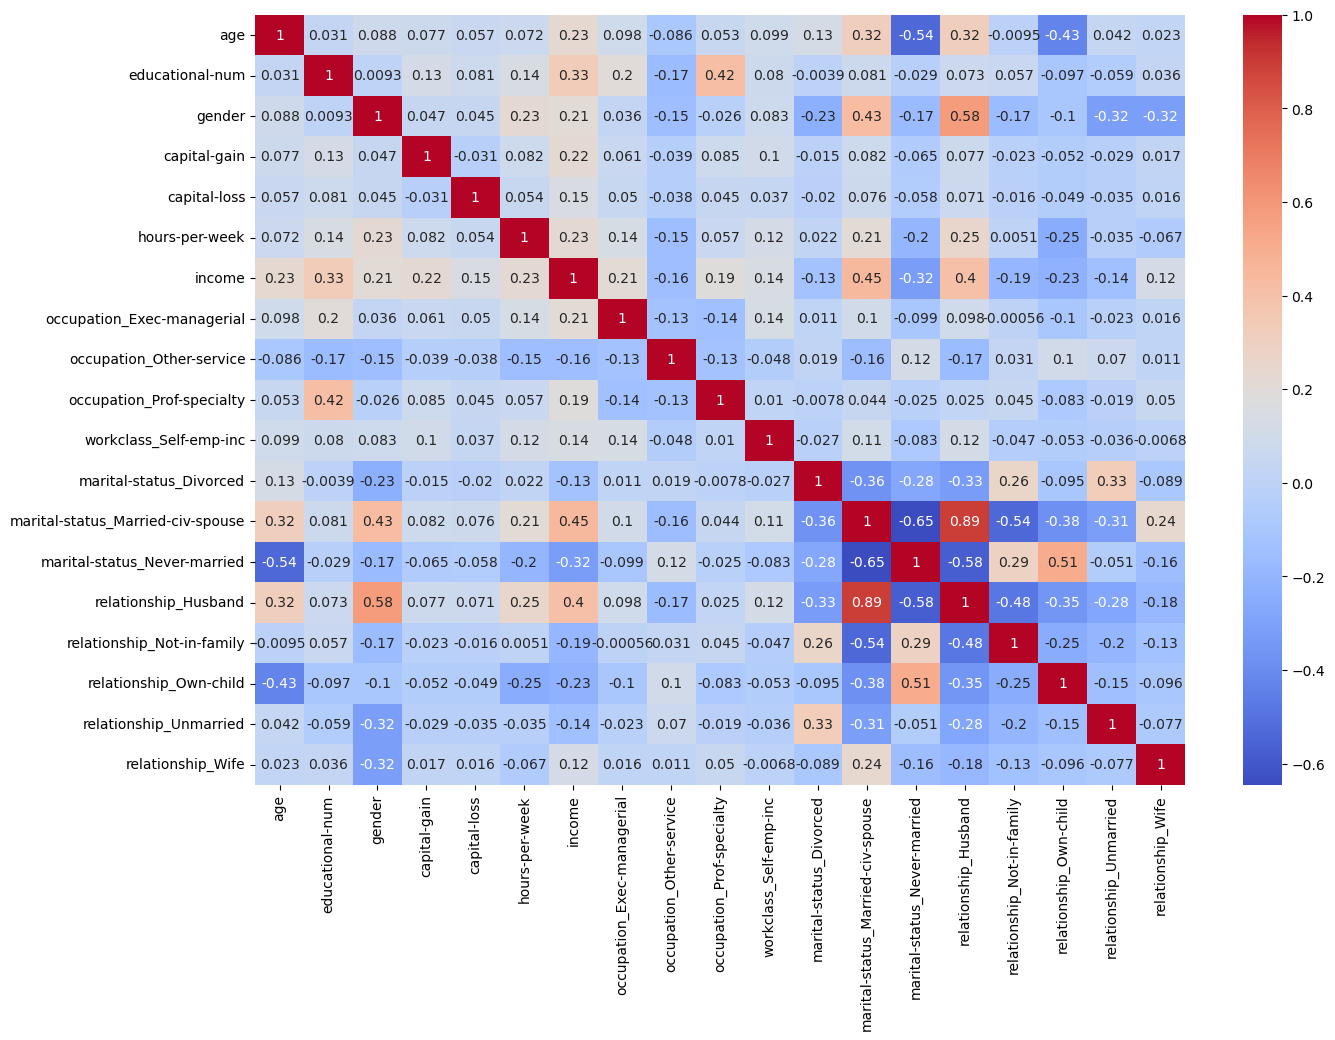

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# drop feature 'fnlwgt'
df = df.drop('fnlwgt', axis=1)
# Split the DataFrame into features (X) and the target label (y)
X = df.drop('income', axis=1)  



In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
37193,42,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31093,52,6,1,0,0,35,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
33814,34,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
14500,28,9,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23399,46,11,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44732,34,10,1,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38158,28,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,46,11,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
y_train

37193    0
31093    0
33814    0
14500    0
23399    0
        ..
11284    0
44732    0
38158    0
860      0
15795    1
Name: income, Length: 39073, dtype: int64

In [51]:
X_test

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
7762,56,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23881,25,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30507,43,13,0,14344,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28911,32,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19484,39,13,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,50,14,1,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18798,51,13,1,5178,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29519,25,13,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
550,18,7,1,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y_test

7762     0
23881    0
30507    1
28911    0
19484    0
        ..
43046    1
18798    1
29519    1
550      0
14337    1
Name: income, Length: 9769, dtype: int64

In [53]:
# Create and fit the Random Forest classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)


RandomForestClassifier()

In [54]:
forest.score(X_test, y_test)

0.8558706111167981

In [55]:
forest.feature_importances_

array([2.27542354e-01, 1.26638176e-01, 1.34899582e-02, 1.11565960e-01,
       3.83183718e-02, 1.15284597e-01, 1.80106292e-03, 5.12209492e-03,
       1.12902591e-04, 5.81338402e-03, 2.16013528e-02, 4.22951115e-03,
       3.08089509e-03, 3.83557438e-03, 7.73813693e-03, 1.96873147e-04,
       1.84632714e-02, 2.89608372e-03, 6.25884583e-03, 4.36070611e-03,
       4.05113825e-03, 1.70525532e-03, 5.29840035e-03, 5.47678843e-03,
       3.86934537e-06, 9.38278632e-03, 6.41550931e-03, 7.75616617e-03,
       4.64545194e-03, 1.46857979e-04, 8.07475634e-03, 3.22093059e-04,
       7.73717655e-02, 1.05136173e-03, 2.73144477e-02, 2.32335784e-03,
       1.85254911e-03, 4.11516175e-02, 1.17356573e-02, 1.88840309e-03,
       5.95243880e-03, 5.71370130e-03, 8.13354659e-03, 1.35911672e-03,
       3.16981947e-03, 4.70886441e-03, 1.04669720e-03, 6.18782699e-03,
       2.81800101e-03, 2.98412385e-04, 1.36049388e-03, 6.06548425e-04,
       3.22270016e-04, 8.14912595e-04, 2.43368576e-04, 1.46073896e-04,
      

In [56]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [58]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [59]:
importances

{'age': 0.22754235424258923,
 'educational-num': 0.12663817550048748,
 'hours-per-week': 0.11528459667521519,
 'capital-gain': 0.11156595961232109,
 'marital-status_Married-civ-spouse': 0.07737176545410863,
 'relationship_Husband': 0.04115161754347087,
 'capital-loss': 0.0383183718183735,
 'marital-status_Never-married': 0.027314447691557706,
 'occupation_Exec-managerial': 0.021601352819726253,
 'occupation_Prof-specialty': 0.01846327136940128,
 'gender': 0.013489958160441115,
 'relationship_Not-in-family': 0.011735657270835528,
 'workclass_Private': 0.009382786315750834,
 'relationship_Wife': 0.008133546590631563,
 'marital-status_Divorced': 0.008074756338432479,
 'workclass_Self-emp-not-inc': 0.007756166165422475,
 'occupation_Other-service': 0.007738136925751549,
 'workclass_Self-emp-inc': 0.006415509314889638,
 'occupation_Sales': 0.006258845831400809,
 'native_country_United-States': 0.006229668183555757,
 'race_White': 0.006187826989124099,
 'relationship_Own-child': 0.0059524387

In [64]:
# Hyperparamether tunning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']

}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

In [70]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.824 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [71]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=4,
                       n_estimators=250)

In [75]:
forest.score(X_test, y_test)

0.8558706111167981

In [73]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [74]:
importances

{'age': 0.22754235424258923,
 'educational-num': 0.12663817550048748,
 'hours-per-week': 0.11528459667521519,
 'capital-gain': 0.11156595961232109,
 'marital-status_Married-civ-spouse': 0.07737176545410863,
 'relationship_Husband': 0.04115161754347087,
 'capital-loss': 0.0383183718183735,
 'marital-status_Never-married': 0.027314447691557706,
 'occupation_Exec-managerial': 0.021601352819726253,
 'occupation_Prof-specialty': 0.01846327136940128,
 'gender': 0.013489958160441115,
 'relationship_Not-in-family': 0.011735657270835528,
 'workclass_Private': 0.009382786315750834,
 'relationship_Wife': 0.008133546590631563,
 'marital-status_Divorced': 0.008074756338432479,
 'workclass_Self-emp-not-inc': 0.007756166165422475,
 'occupation_Other-service': 0.007738136925751549,
 'workclass_Self-emp-inc': 0.006415509314889638,
 'occupation_Sales': 0.006258845831400809,
 'native_country_United-States': 0.006229668183555757,
 'race_White': 0.006187826989124099,
 'relationship_Own-child': 0.0059524387

### Work in progress...